In [29]:
import numpy as np
import matplotlib.pyplot as plt

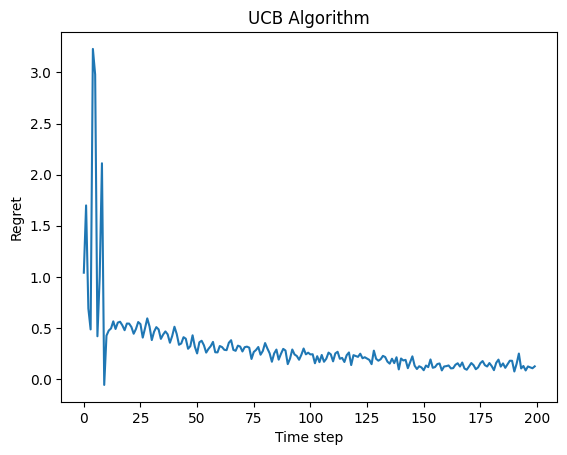

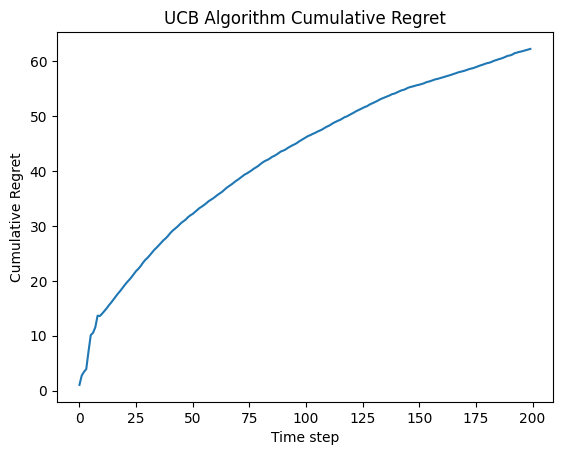

In [30]:
k = 10
n = 200
runs = 1000
true_means = np.random.normal(0, 1, k)
Regret = np.zeros((n))

for run in range(runs):

    N = np.zeros(k)
    Q = np.zeros(k)
    UCB = np.zeros(k)
    total_reward = 0
    
    for i in range(k): # i is the time step
        reward = np.random.normal(true_means[i], 1)
        N[i] += 1
        Q[i] = reward
        total_reward += reward
        Regret[i] += max(true_means) - reward
        
    for i in range(k, n): # i is the time step
        for j in range(k):
            UCB[j] = Q[j] + np.sqrt(2*np.log(i^2)/N[j]) # UCB where delta = 1/(i^2)
            
        action = np.argmax(UCB)
        reward = np.random.normal(true_means[action], 1)
        total_reward += reward
        N[action] += 1
        Q[action] += (reward - Q[action])/N[action]
        Regret[i] += max(true_means) - reward

Regret = Regret/runs

plt.plot(Regret)
plt.xlabel('Time step')
plt.ylabel('Regret')
plt.title('UCB Algorithm')
plt.show()

cumulative_regret = np.cumsum(Regret)
plt.plot(cumulative_regret)
plt.xlabel('Time step')
plt.ylabel('Cumulative Regret')
plt.title('UCB Algorithm Cumulative Regret')
plt.show()